# Graph of Perez speed in Monaco

In [1]:
import fastf1
import numpy as np
import pandas as pd

from IPython.display import clear_output
from time import sleep
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap
from matplotlib import cm

In [2]:
fastf1.Cache.enable_cache("./cache")

In [3]:
ses = fastf1.get_session(2022, "Monaco Grand Prix", "R")
ses.load()
clear_output()

In [4]:
wd = ses.weather_data
wd

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:03.938000,24.2,68.0,1002.9,False,42.1,70,0.8
1,0 days 00:01:03.941000,24.2,68.0,1002.7,False,41.5,346,0.8
2,0 days 00:02:03.935000,24.2,68.0,1002.9,False,41.5,335,2.4
3,0 days 00:03:03.939000,24.1,68.0,1002.9,False,41.3,320,0.6
4,0 days 00:04:03.938000,24.2,69.0,1002.9,False,41.2,51,0.6
...,...,...,...,...,...,...,...,...
240,0 days 04:00:04.543000,22.3,65.0,1003.4,False,29.5,166,1.0
241,0 days 04:01:04.560000,22.4,65.0,1003.2,False,29.9,165,1.1
242,0 days 04:02:04.561000,22.4,66.0,1003.2,False,29.8,142,0.6
243,0 days 04:03:04.570000,22.5,66.0,1003.2,False,30.1,0,0.6


In [5]:
time_in_mins = wd.Time.map(lambda t: t.asm8.item() / 60_000_000_000)

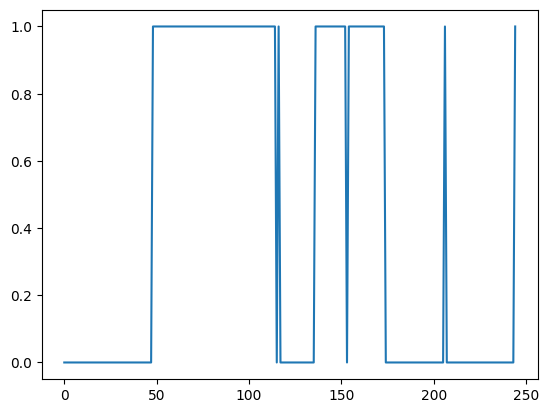

In [6]:
plt.plot(time_in_mins, wd.Rainfall)

In [7]:
100 * wd.Rainfall.sum() / len(wd.Rainfall)

43.673469387755105

W pierwszych 48 minutach wyścigu nie zaobserwowalismy deszczu, natomiast przez następne 48 min padało
Lecz niestety zaden zawodnik sie wtedy nie scigal


In [8]:
ses.load_telemetry()
clear_output()

In [17]:
ses.get_driver("LEC")

DriverNumber                         63
BroadcastName                 G RUSSELL
Abbreviation                        RUS
TeamName                       Mercedes
TeamColor                        6cd3bf
FirstName                        George
LastName                        Russell
FullName                 George Russell
Position                            5.0
GridPosition                        6.0
Q1                                  NaT
Q2                                  NaT
Q3                                  NaT
Time             0 days 01:56:42.233000
Status                         Finished
Points                             10.0
Name: George, dtype: object

In [10]:
ses.laps.pick_driver("PER")

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 02:06:35.799000,11,NaT,1,0 days 02:04:16.197000,0 days 02:04:15.170000,NaT,0 days 00:01:02.877000,0 days 00:00:34.691000,NaT,...,INTERMEDIATE,1.0,True,2,0 days 02:04:00.206000,Red Bull Racing,PER,2,False,2022-05-29 14:05:00.227
1,0 days 02:08:58.942000,11,0 days 00:02:23.143000,2,NaT,NaT,0 days 00:00:35.097000,0 days 00:01:04.135000,0 days 00:00:43.911000,0 days 02:07:10.896000,...,INTERMEDIATE,2.0,True,2,0 days 02:06:35.799000,Red Bull Racing,PER,4,False,2022-05-29 14:07:35.820
2,0 days 02:10:43.512000,11,0 days 00:01:44.570000,3,NaT,NaT,0 days 00:00:28.244000,0 days 00:00:48.546000,0 days 00:00:27.780000,0 days 02:09:27.186000,...,INTERMEDIATE,3.0,True,2,0 days 02:08:58.942000,Red Bull Racing,PER,1,False,2022-05-29 14:09:58.963
3,0 days 02:12:25.889000,11,0 days 00:01:42.377000,4,NaT,NaT,0 days 00:00:27.351000,0 days 00:00:47.512000,0 days 00:00:27.514000,0 days 02:11:10.863000,...,INTERMEDIATE,4.0,True,2,0 days 02:10:43.512000,Red Bull Racing,PER,1,True,2022-05-29 14:11:43.533
4,0 days 02:14:06.118000,11,0 days 00:01:40.229000,5,NaT,NaT,0 days 00:00:27.101000,0 days 00:00:46.748000,0 days 00:00:26.380000,0 days 02:12:52.990000,...,INTERMEDIATE,5.0,True,2,0 days 02:12:25.889000,Red Bull Racing,PER,1,True,2022-05-29 14:13:25.910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0 days 03:55:18.532000,11,0 days 00:01:18.977000,60,NaT,NaT,0 days 00:00:20.727000,0 days 00:00:37.271000,0 days 00:00:20.979000,0 days 03:54:20.282000,...,MEDIUM,30.0,True,4,0 days 03:53:59.555000,Red Bull Racing,PER,2,True,2022-05-29 15:54:59.576
60,0 days 03:56:37.167000,11,0 days 00:01:18.635000,61,NaT,NaT,0 days 00:00:20.604000,0 days 00:00:37.198000,0 days 00:00:20.833000,0 days 03:55:39.136000,...,MEDIUM,31.0,True,4,0 days 03:55:18.532000,Red Bull Racing,PER,1,True,2022-05-29 15:56:18.553
61,0 days 03:57:55.164000,11,0 days 00:01:17.997000,62,NaT,NaT,0 days 00:00:20.579000,0 days 00:00:36.774000,0 days 00:00:20.644000,0 days 03:56:57.746000,...,MEDIUM,32.0,True,4,0 days 03:56:37.167000,Red Bull Racing,PER,1,True,2022-05-29 15:57:37.188
62,0 days 03:59:12.864000,11,0 days 00:01:17.700000,63,NaT,NaT,0 days 00:00:20.502000,0 days 00:00:36.739000,0 days 00:00:20.459000,0 days 03:58:15.666000,...,MEDIUM,33.0,True,4,0 days 03:57:55.164000,Red Bull Racing,PER,1,True,2022-05-29 15:58:55.185


In [11]:
perez_laps = ses.laps.pick_driver("PER").pick_accurate()

In [ ]:
perez_laps

In [13]:
p_time = []
p_rainfall = []
perez_norain = []
perez_rain = []
for lap_id in range(len(perez_laps)):
    lap = perez_laps.iloc[lap_id]
    p_time.append(lap.Time.asm8.item() / 60_000_000_000)
    rf = lap.get_weather_data().Rainfall
    p_rainfall.append(rf)
    if rf:
        perez_rain.append(lap.get_telemetry())
    else:
        perez_norain.append(lap.get_telemetry())
    clear_output()

In [14]:
len(perez_norain)

35

In [15]:
len(perez_rain)

17

In [33]:
perez_nr_df = pd.concat(perez_norain, ignore_index=True)
perez_r_df = pd.concat(perez_rain, ignore_index=True)

Relative distance value cleanup

In [34]:
perez_nr_df = perez_nr_df[perez_nr_df.RelativeDistance > 0]
perez_r_df = perez_r_df[perez_r_df.RelativeDistance > 0]

In [54]:
perez_nr_df = perez_nr_df.assign(
    TrackBucket = (perez_nr_df.RelativeDistance * 500) // 1 + 1
)
perez_r_df = perez_r_df.assign(
    TrackBucket = (perez_r_df.RelativeDistance * 500) // 1 + 1
)

In [99]:
perez_data_norain = perez_nr_df.groupby("TrackBucket").aggregate(
    X = pd.NamedAgg(column="X", aggfunc="mean"),
    Y = pd.NamedAgg(column="Y", aggfunc="mean"),
    Speed = pd.NamedAgg(column="Speed", aggfunc="mean"),
    Throttle = pd.NamedAgg(column="Throttle", aggfunc="mean")
)
perez_data_rain = perez_r_df.groupby("TrackBucket").aggregate(
    X = pd.NamedAgg(column="X", aggfunc="mean"),
    Y = pd.NamedAgg(column="Y", aggfunc="mean"),
    Speed = pd.NamedAgg(column="Speed", aggfunc="mean"),
    Throttle = pd.NamedAgg(column="Throttle", aggfunc="mean")
)

In [114]:
perez_data_norain.Throttle.mean()

56.01226585053971

In [115]:
perez_data_rain.Throttle.mean()

48.79990468796774

## Graphing function

In [116]:
def create_lc(
    telemetry: pd.DataFrame,
    on: str,
    cmap) -> LineCollection:
    x = np.array(telemetry["X"].values)
    y = np.array(telemetry["Y"].values)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    speed = telemetry[on].to_numpy().astype(float)

    lc_comp = LineCollection(segments, linestyle='solid')
    lc_comp.set_array(speed)
    lc_comp.set_linewidth(4)

    if cmap is not None:
        lc_comp.set_cmap(cmap)
        
    return lc_comp


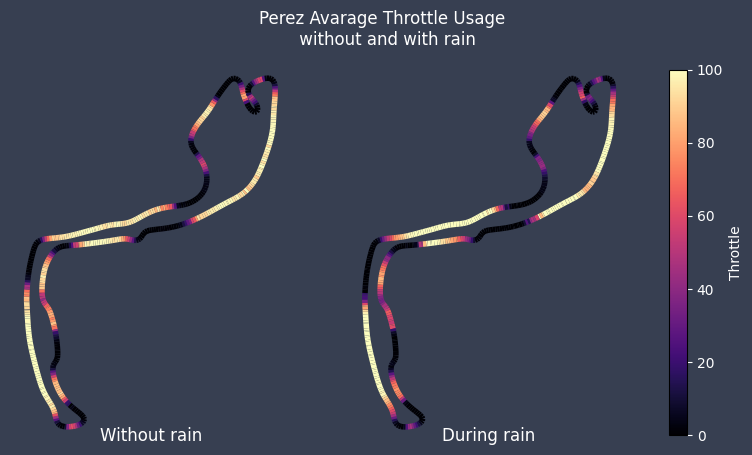

In [154]:
from turtle import color


x = np.array(perez_data_norain["X"].values)
y = np.array(perez_data_norain["Y"].values)

on = "Throttle"
cmap = cm.get_cmap("magma")
title = "Perez Avarage Throttle Usage \n without and with rain"
bg_color = "#373F51"

lc_comp = create_lc(perez_data_norain, on, cmap)
lc_comp2 = create_lc(perez_data_rain, on, cmap)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.set_facecolor(bg_color)
for ax in axes.flat:
    ax.set_facecolor(bg_color)
    ax.set_frame_on(False)
    ax.set_xlim(np.min(x) - 500, np.max(x) + 500)
    ax.set_ylim(np.min(y) - 500, np.max(y) + 500)
    ax.set_axis_off()

axes[0].add_collection(lc_comp)
axes[0].set_title("Without rain", y=-0.01, x=0.5, color="white")
axes[1].add_collection(lc_comp2)
axes[1].set_title("During rain", y=-0.01, x=0.5, color="white")

# plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
if title is not None:
    figtitle = plt.suptitle(title, color="white")

colorbar = fig.colorbar(lc_comp2, ax=axes.ravel().tolist(), shrink=0.95)
colorbar.ax.tick_params(color="white", labelcolor="white")
colorbar.set_label("Throttle", color="white")


plt.savefig("Perez.png", transparent=False)
